In [1]:
import numpy as np
from scipy.stats import expon
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

## Generating Data (exponential distribution)

In [2]:
def generate_data(sample_size_1, sample_size_2,
                  sample_scale_1, sample_scale_2,
                  sample_loc_1, sample_loc_2,
                  seed=None):
    # Set seed, if needed
    np.random.seed(seed)
    
    # Generate zero matrix, there size = sample_size_1 + sample_size_2; and dimension = 2 
    X = np.zeros((sample_size_1 + sample_size_2, 2))
    
    X[:sample_size_1] = expon.rvs(loc=sample_loc_1,
                                  scale=sample_scale_1,
                                  size=(sample_size_1, 2))
    
    X[sample_size_1:sample_size_1+sample_size_2] = expon.rvs(loc=sample_loc_2,
                                                             scale=sample_scale_2,
                                                             size=(sample_size_2, 2))
    
    return X

### Initial data

In [3]:
sample_size_1 = 6000
sample_size_2 = 4000
size = sample_size_1 + sample_size_2
sample_scale_1 = 1.25
sample_scale_2 = 2.75
sample_loc_1 = 17
sample_loc_2 = 25

dim = 2

In [4]:
X = generate_data(sample_size_1, sample_size_2, sample_scale_1, sample_scale_2, sample_loc_1, sample_loc_2)

### Let's check how our mixture of distributions looks like

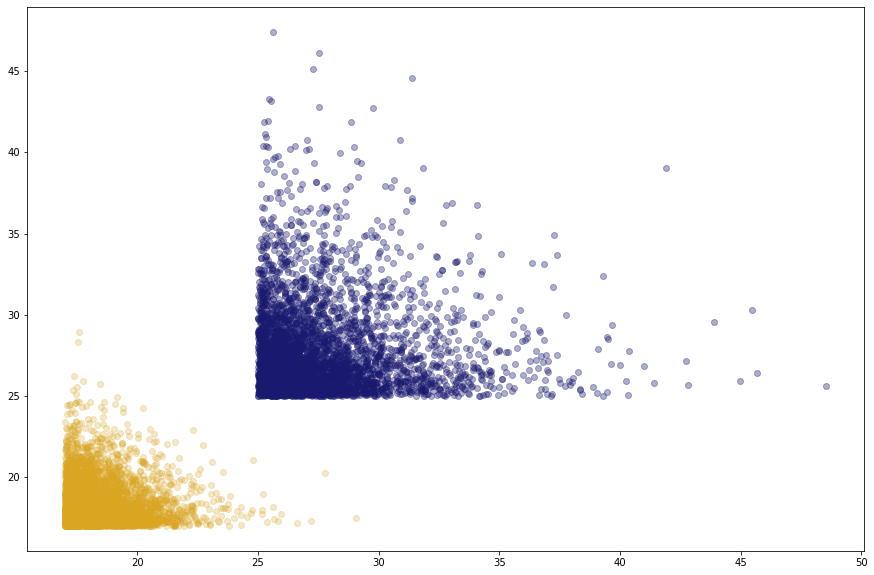

In [5]:
fig = plt.figure(figsize=(15, 10))
plt.plot(X[:sample_size_1, 0], X[:sample_size_1, 1], 'o', alpha=0.25, color='goldenrod')
plt.plot(X[sample_size_1:size, 0], X[sample_size_1:size, 1], 'o', alpha = 0.35, color='midnightblue')

## EM - algorithm

In [6]:
def prob_density_func(X, lambd=1):
    return lambd * np.exp(-lambd * X)

def prob_density_func_negative(X, lambd=1):
    return -lambd * np.exp(-lambd * X)

In [7]:
def EM_algorithm(X, size, dim, max_iter=15):
    #initialize weights and lambdas
    weights = np.array([float(1.0/dim), float(1.0/dim)])
    phi = np.full(shape=dim, fill_value=float(0.5/dim))
    
    for i in range(max_iter):
        g = e_step(X, dim, weights, phi)
        
        weights, phi = m_step(X, g, phi, dim)
        
        X1_new_indx, X2_new_indx = find_new_x(g)
        
        draw_graph(X, X1_new_indx, X2_new_indx)
    
    return weights, phi

In [8]:
def e_step(X, dim, weights, phi):
    g = np.zeros((len(X), dim))
    g = weights * prob_density_func(X, phi) / np.sum(weights*prob_density_func(X, phi))
    
    assert np.abs(np.sum(g) - 1) < 0.0001, 'Sum of probabilities must be equal to 1!'
    
    return g

In [9]:
def m_step(X, g, phi, dim):
    weights_new = np.array((np.sum(g) / len(X), np.sum(g) / len(X)))
    optim_results = [0 for i in range(dim)]
    phi_new = np.zeros(dim)
    
    func_to_minimize = lambda _phi: np.sum(g * (prob_density_func(X, _phi)))
    
    for j in range(dim):    
        optim_results[j] = minimize(fun=func_to_minimize, x0=phi)
        phi_new[j] = optim_results[j].x[j]
        
    return weights_new, phi_new

In [10]:
def find_new_x(g):
    X1_new_indx = []
    X2_new_indx = []
    
    counter = 0
    for i in range(len(g)):
        if g[i][1] >= 1e-6:
            X1_new_indx.append(counter)
        else:
            X2_new_indx.append(counter)
        counter += 1
    
    return X1_new_indx, X2_new_indx

## Drawing function for predicted dots

In [11]:
def draw_graph(X, X1_new_indx, X2_new_indx):
    fig = plt.figure(figsize=(15, 10))
    plt.plot(X[X1_new_indx,0], X[X1_new_indx,1], 'o', alpha=0.25, color='goldenrod')
    plt.plot(X[X2_new_indx,0], X[X2_new_indx,1], 'o', alpha = 0.35, color='midnightblue')

## Let's test EM-algorithm

(array([0.0001, 0.0001]), array([0.76861132, 0.76888152]))

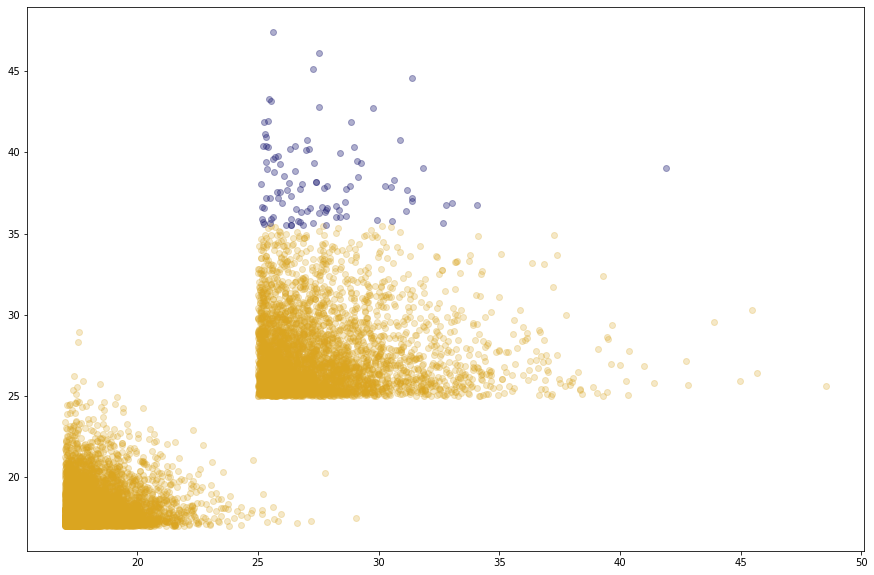

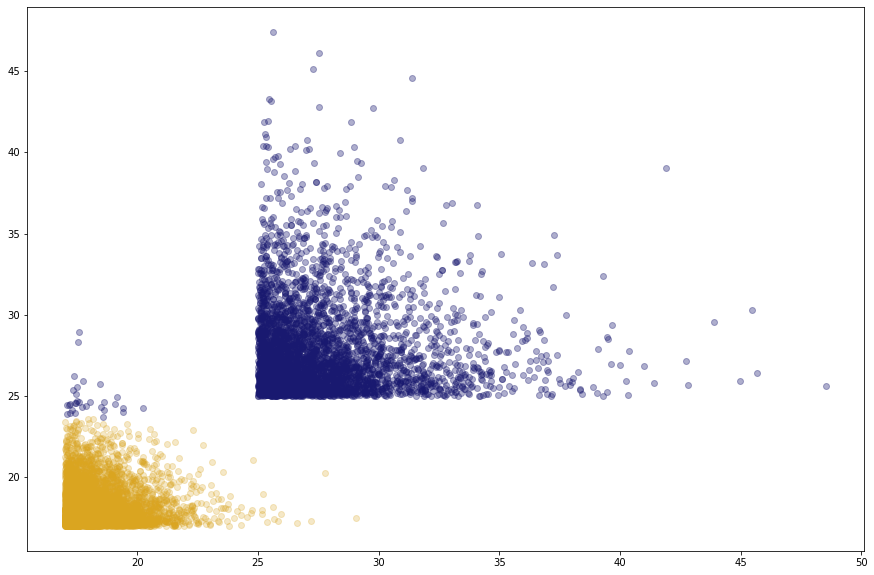

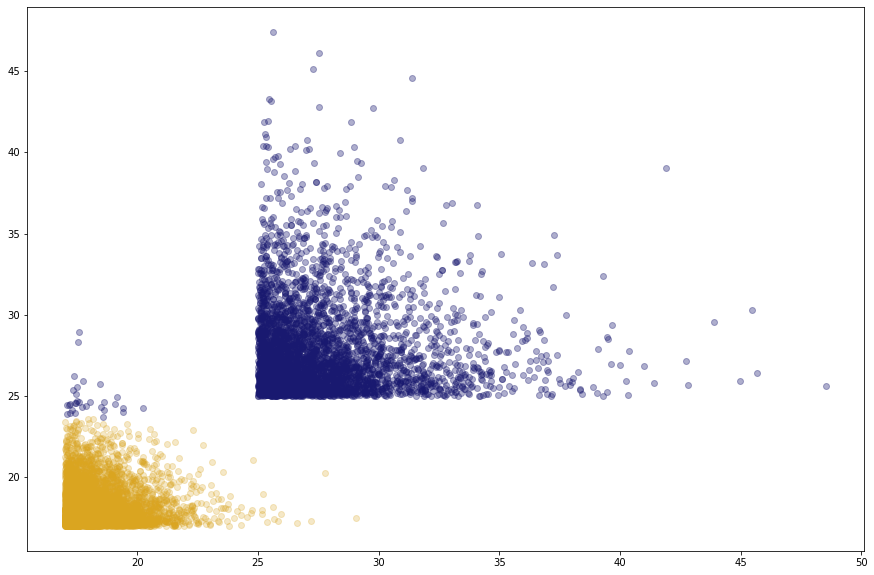

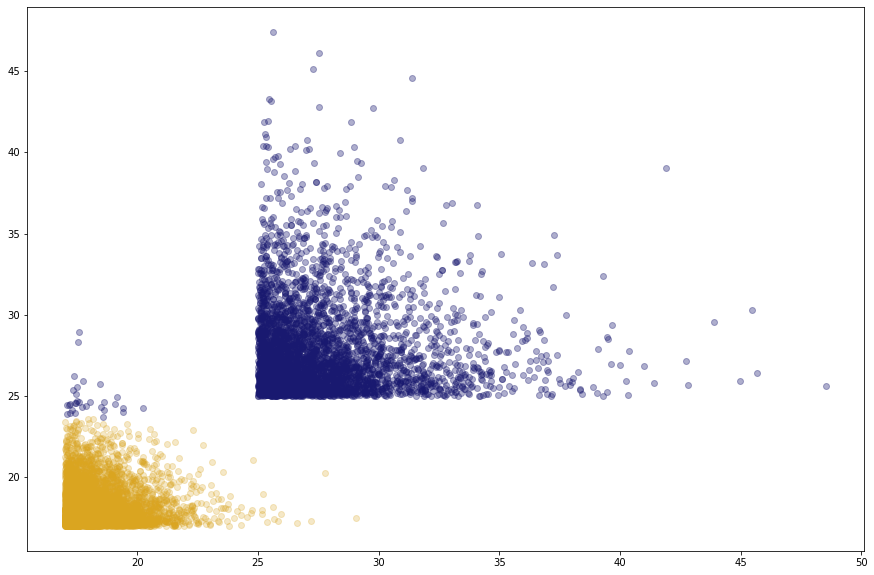

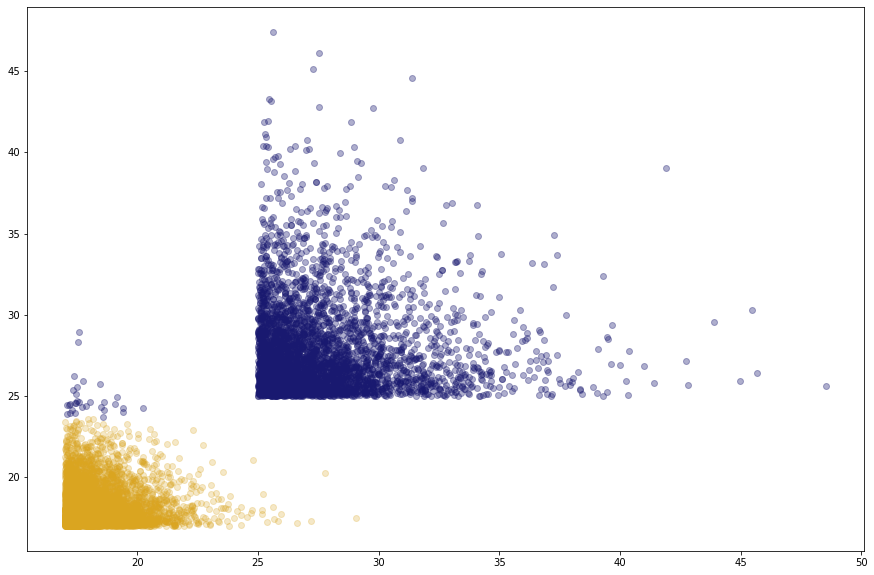

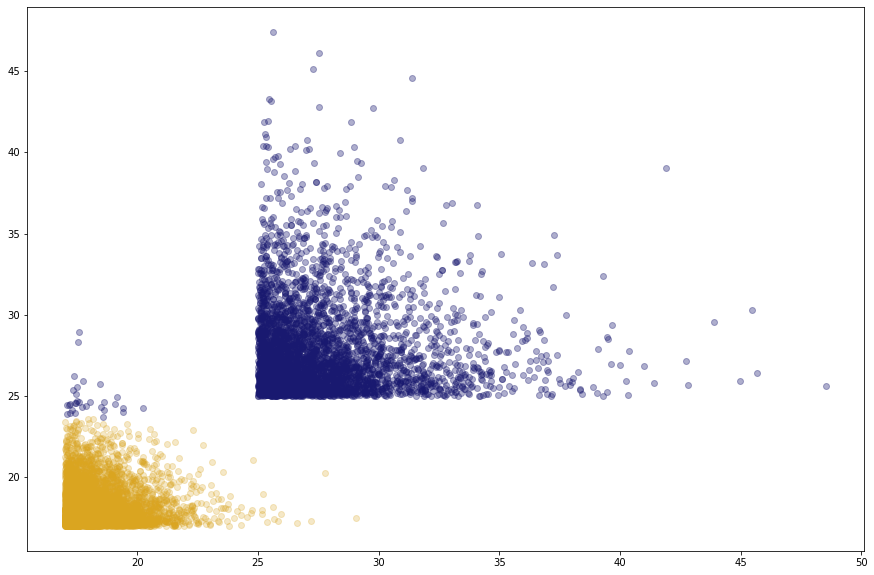

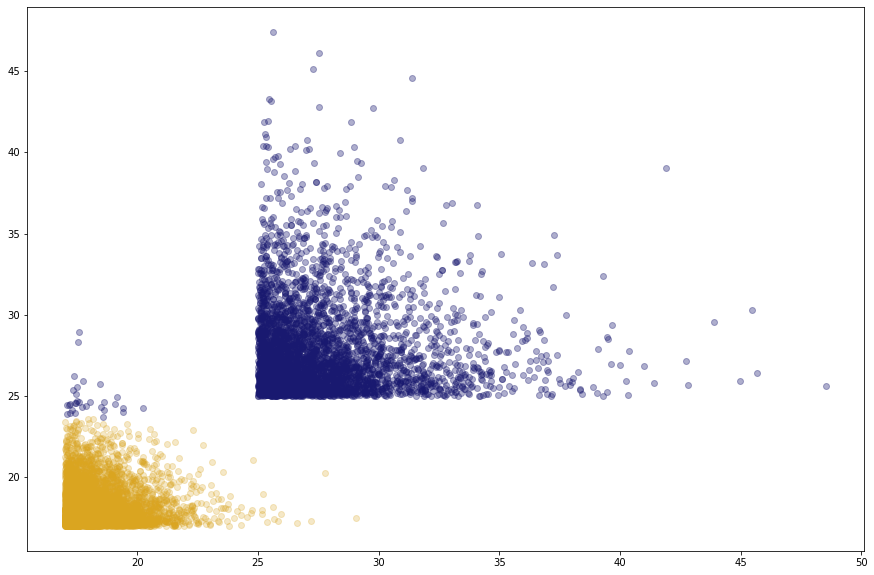

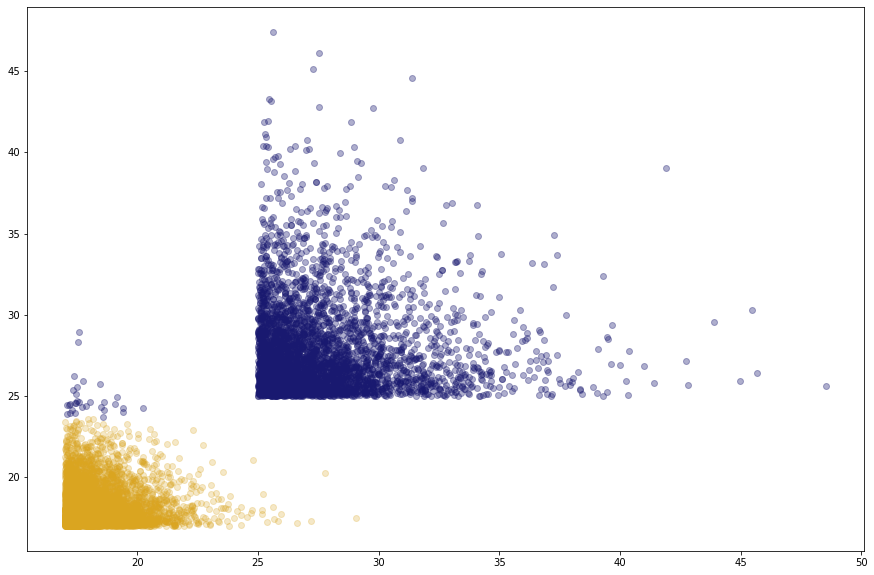

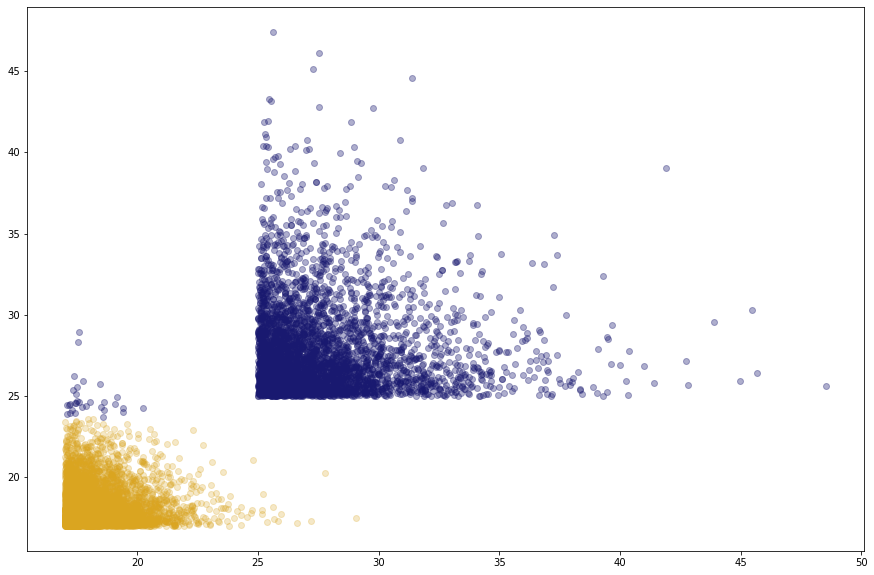

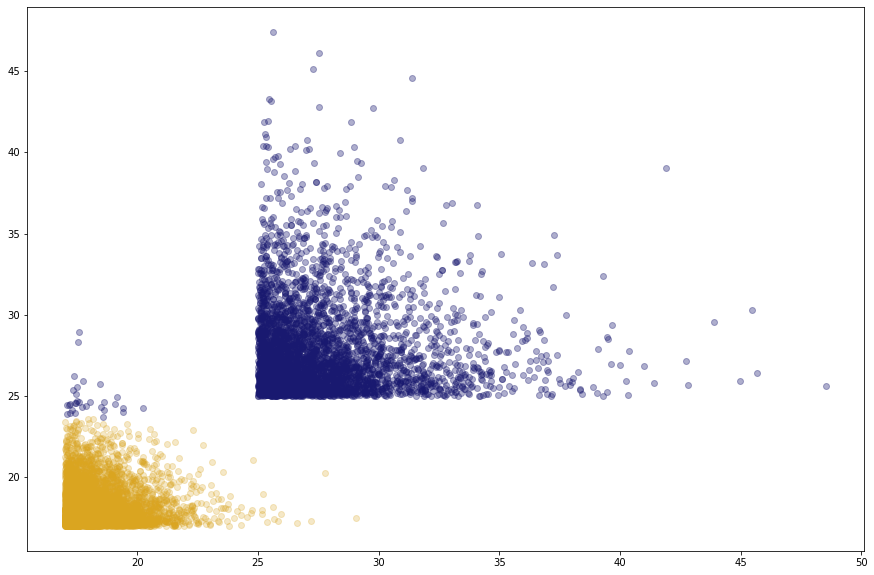

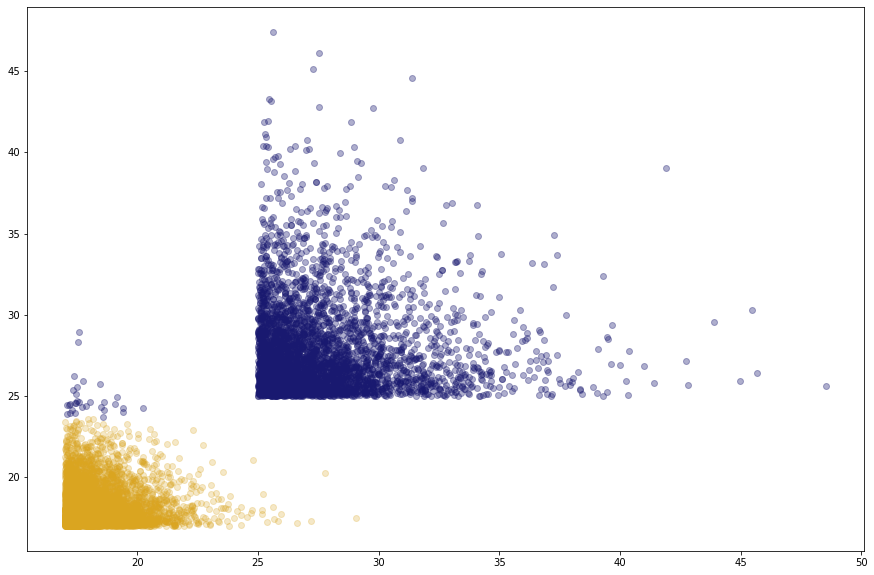

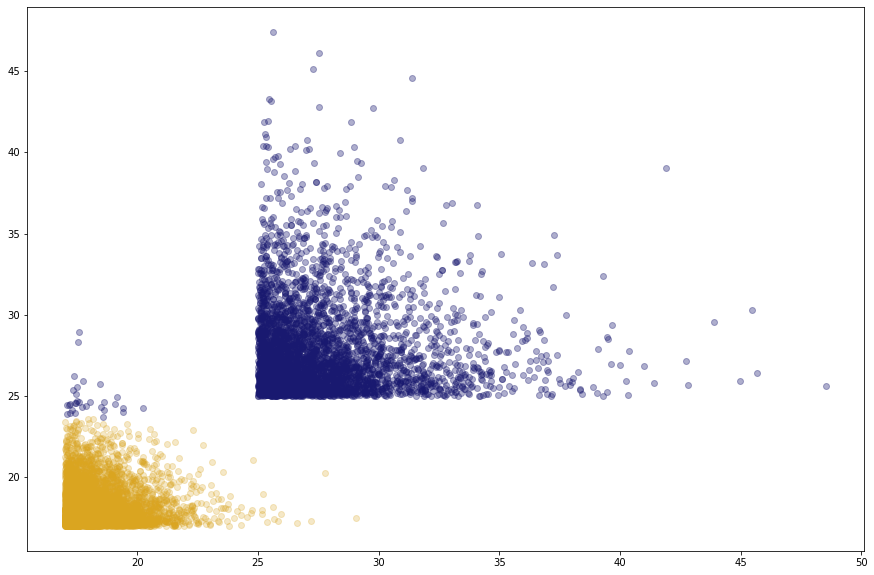

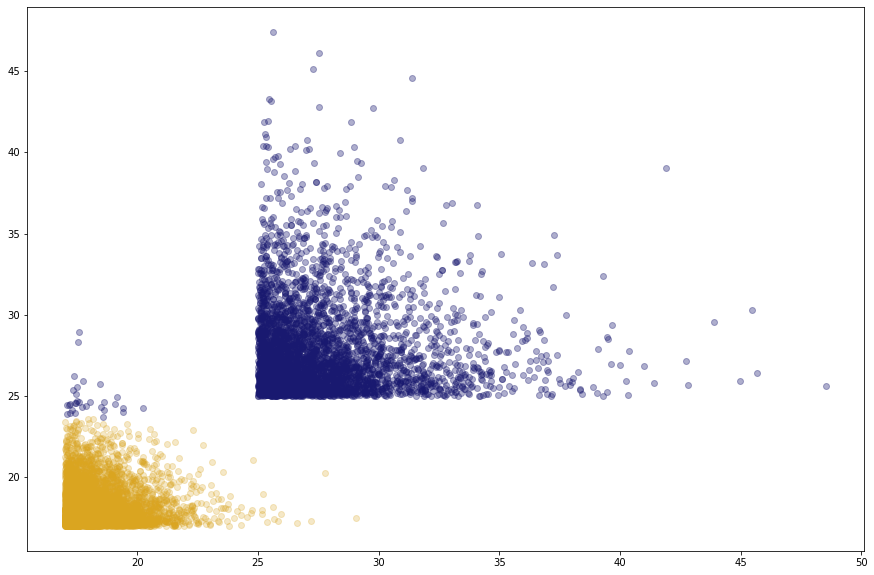

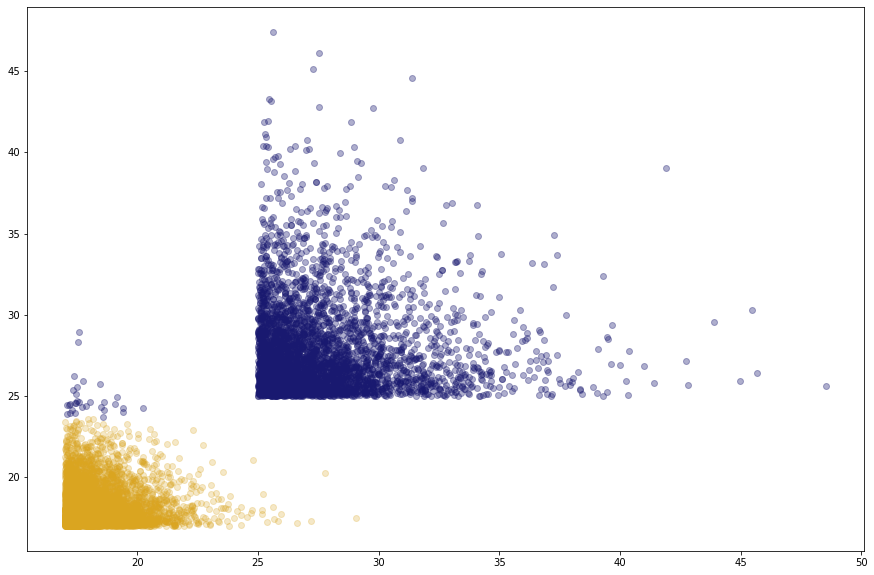

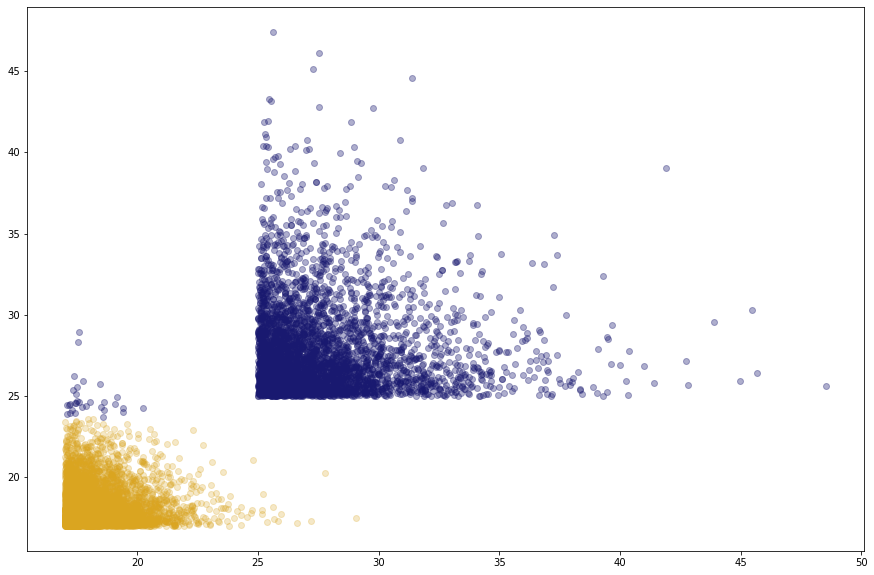

In [12]:
EM_algorithm(X, size, dim)